# matplotlib绘图库


## matplotlib绘图的核心原理介绍

使用matplotlib绘图的原理，主要就是理解figure(画布)、axes(坐标系)、axis(坐标轴)三者之间的关系。

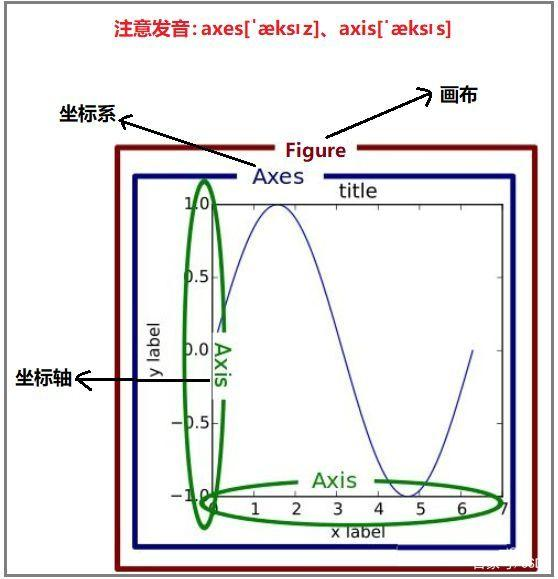

以“美院学生张三写生画画”为例，来说明这三者之间的关系。

张三的画板
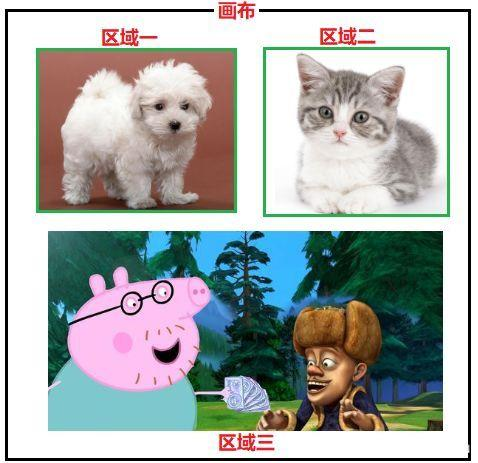

首先，张三想要画画，是不是需要在画板上面准备一张画布。对比到matplotlib中，就相当于初始化了一张figure(画布)，我们画的任何图形，都是在这张figure(画布)上操作的。

接着，张三需要给figure(画布)分配不同的区域，指定哪一块儿究竟该画什么。对比到matplotlib中，就是需要指定axes(坐标系)，每一个axes(坐标系)相当于一张画布上的一块区域。一张画布上，可以分配不同区域，也就是说，一张画布，可以指定多个axes(坐标系)。

最后，张三就是在分配好的不同区域上进行图形绘制了，在一张画布上，画的最多的应该就是2D图，也可以画3D图，如图所示，张三在区域一画了一个小狗，在区域二画了一个小猫，在区域三画了一个光头强。对比到matplotlib中，我们在axes1中画了一个条形图，在axes2中画了一个饼图，在axes3中画了一个折线图。当是2D图时，都会有一个X轴和一个Y轴；当是3D图时，都会有一个X轴、一个Y轴和一个Z轴，这个轴就是我们所说的“坐标轴axis”。

matplotlib绘图

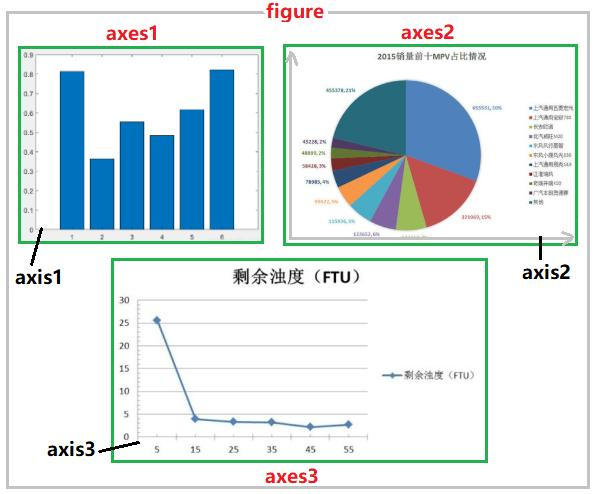

通过上述分析，总结如下：一个figure(画布)上，可以有多个区域axes(坐标系)，我们在每个坐标系上绘图，也就是说每个axes(坐标系)中，都有一个axis(坐标轴)。

特别注意：在matplotlib中，figure画布和axes坐标轴并不能显示的看见，我们能够看到的就是一个axis坐标轴的各种图形。

## matplotlib库的导入

Note

In older examples, you may find examples that instead used the so-called interface, via . This star-import imports everything both from pyplot and from numpy, so that one could do pylab from pylab import *
```
x = linspace(0, 2, 100)
plot(x, x, label='linear')
...
```
for an even more MATLAB-like style. This approach is strongly discouraged nowadays and deprecated; it is only mentioned here because you may still encounter it in the wild.

Matplotlib是整个软件包； matplotlib.pyplot 是Matplotlib中的模块；以及 pylab 是安装在一起的模块 matplotlib .
pylab 是批量导入的便利模块 matplotlib.pyplot （用于绘图）和 numpy （用于数学和使用数组）在单个名称空间中。Pylab被弃用，由于名称空间污染，它的使用受到了强烈的限制。改用Pyplot。

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# 排除警告信息
import warnings
warnings.filterwarnings("ignore")
# 打印版本信息
display(np.__version__)
display(pd.__version__)
display(mpl.__version__)
# matplotlib画图常见参数设置
mpl.rcParams["font.family"] = "SimHei" # 设置字体
mpl.rcParams["axes.unicode_minus"]=False # 用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
# 嵌入式显示图形
%matplotlib inline

'1.18.1'

'1.0.3'

'3.1.3'

## 创建figure(画布)的两种方式

1）绘制一个最简单的折线图

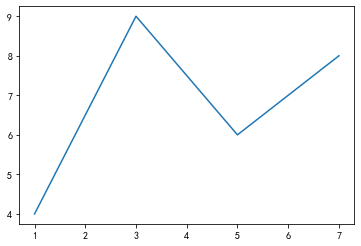

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
x = [1,3,5,7]
y = [4,9,6,8]
plt.plot(x,y)
plt.show()

结果分析：

在前面的叙述中，我们已经说过，想要使用matplotlib绘图，必须先要创建一个figure(画布)对象，然后还要有axes(坐标系)。但是观察上述代码，我们并没有创建figure对象，那么怎么又可以画图呢？

对于上述疑问，接下来我们就要讲述创建figure(画布)的两种方式。


2）创建figure(画布)的两种方式

* 隐式创建

* 显示创建

① 隐式创建figure对象

当第一次执行plt.xxx()画图代码时，系统会去判断是否已经有了figure对象，如果没有，系统会自动创建一个figure对象，并且在这个figure之上，自动创建一个axes坐标系(注意：默认创建一个figure对象，一个axes坐标系)。

也就是说，如果我们不设置figure对象，那么一个figure对象上，只能有一个axes坐标系，即我们只能绘制一个图形。

② 隐式创建figure对象存在的问题

优势：如果只是绘制一个小图形，那么直接使用plt.xxx()的方式，会自动帮我们创建一个figure对象和一个axes坐标系，这个图形最终就是绘制在这个axes坐标系之上的。

劣势：如果我们想要在一个figure对象上，绘制多个图形，那么我们就必须拿到每个个axes对象，然后调用每个位置上的axes对象，就可以在每个对应位置的坐标系上，进行绘图，如下图所示。注意：如果figure对象是被默认创建的，那么我们根本拿不到axes对象。因此，需要我们显示创建figure对象。

③ 显示创建figure对象：以后的文章会详细讲述布局设置


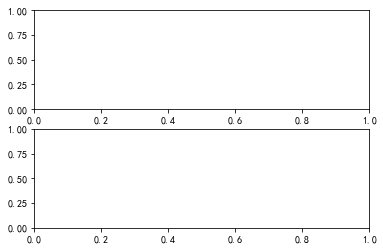

In [3]:
# 手动创建一个figure对象
figure = plt.figure()# 获取每个位置的axes对象
axes1 = figure.add_subplot(2,1,1)
axes2 = figure.add_subplot(2,1,2)

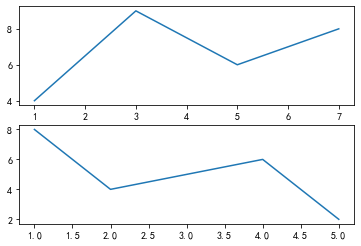

In [5]:
figure = plt.figure()
axes1 = figure.add_subplot(2,1,1)
axes2 = figure.add_subplot(2,1,2)
axes1.plot([1,3,5,7],[4,9,6,8])
axes2.plot([1,2,4,5],[8,4,6,2])
figure.show()

## 完整的绘图步骤

① 导库
```
import matplotlib as mpl
import matplotlib.pyplot as plt
```
② 创建figure画布对象

如果绘制一个简单的小图形，我们可以不设置figure对象，使用默认创建的figure对象，当然我们也可以显示创建figure对象。如果一张figure画布上，需要绘制多个图形。那么就必须显示的创建figure对象，然后得到每个位置上的axes对象，进行对应位置上的图形绘制。

③ 根据figure对象进行布局设置

1*11*22*12*2...

④ 获取对应位置的axes坐标系对象
```
figure = plt.figure()
axes1 = figure.add_subplot(2,1,1)
axes2 = figure.add_subplot(2,1,1)
```
⑤ 调用axes对象，进行对应位置的图形绘制

这一步，是我们传入数据，进行绘图的一步。对于图形的一些细节设置，都可以在这一步进行。

⑥ 显示图形

plt.show()或figure.show()如果在pycharm中绘图的话，必须要加这句代码，才能显示。
如果在notebook中进行绘图，可以不用加这句代码，而是自动显示。

绘图技巧(细节设置)

通过对matplotlib绘图的原理，有所了解之后，我们需要学习的就是常见的matplotlib绘图技巧。

* figure 画布
* axes 坐标系，一个画布上可以有多个坐标系
* axis 坐标轴，一个坐标系中可以有多个坐标轴，一般都是二维平面坐标系，或者三维立体坐标系
* title 标题
* legend 图例
* grid 背景网格
* tick 刻度
* axis label 坐标轴名称
* tick label 刻度名称
* major tick label 主刻度标签 
* minor tick label 副刻度标签
* line 线
* style 线条样式
* marker 点标记
* font 字体相关

常见的绘图技巧如上所示，这些绘图技巧都能够很好的帮助我们画出更美观、更直观的图形。

## Parts of a Figure(matplotlib图的构成部件)

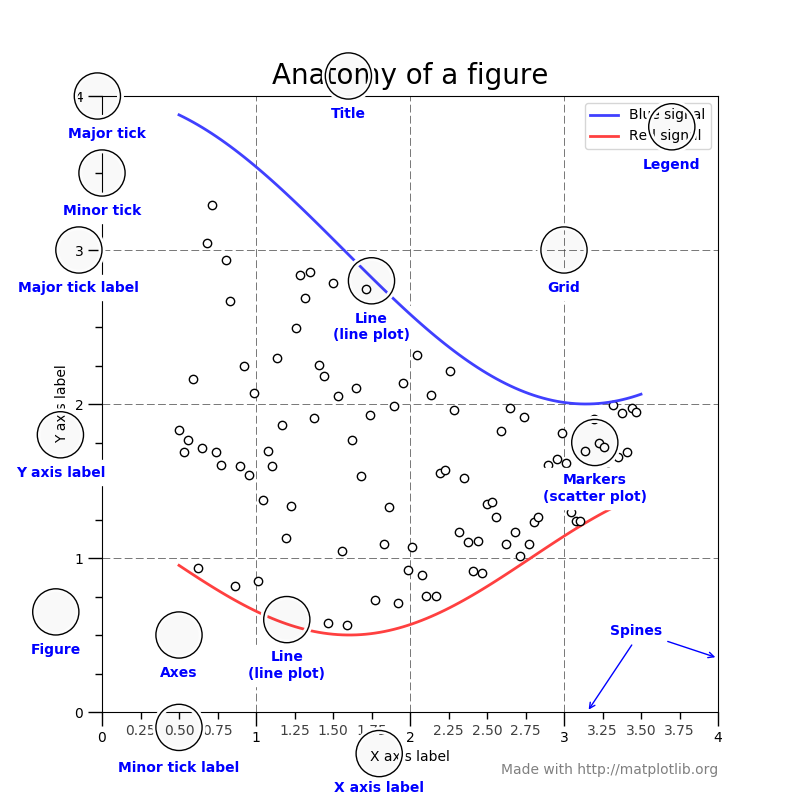

### Figure¶
这个 整体 数字。这个数字记录了所有的孩子 Axes 少量的“特殊”艺术家（头衔、人物传说等），以及 帆布 . （不要太担心画布，它是至关重要的，因为它实际上是一个对象来绘制您的绘图，但作为用户，它或多或少对您是不可见的）。一个数字可以有任何数字 Axes 但要有用，至少要有一个。

创建新图形的最简单方法是使用Pyplot：

<Figure size 432x288 with 0 Axes>

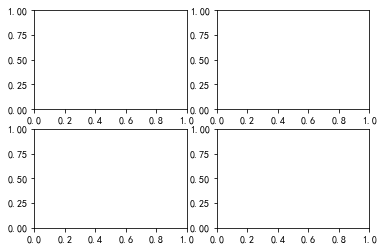

In [7]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

### Axes¶
这就是你所认为的“绘图”，它是图像中带有数据空间的区域。给定的图形可以包含多个轴，但给定的 Axes 对象只能位于一个 Figure . 轴包含两个（如果是三维的，则为三个） Axis 对象（注意 Axes 和 Axis ）它负责处理数据限制（数据限制也可以通过设置通过 set_xlim() 和 set_ylim() Axes 方法）。各 Axes 有标题（通过设置 set_title() ）X标签（通过设置 set_xlabel() ）和Y标签集，通过 set_ylabel() ）

这个 Axes 类及其成员函数是使用OO接口的主要入口点。


 
### Axis
这些是类似数字线的对象。它们负责设置图形限制并生成记号（轴上的标记）和记号标签（标记记号的字符串）。刻度的位置由 Locator 对象和TickLabel字符串的格式由 Formatter . 正确的组合 Locator 和 Formatter 对刻度线位置和标签进行非常精细的控制。

### Artist
基本上，你能看到的一切都是一个艺术家（甚至 Figure ， Axes 和 Axis 对象）。这包括 Text 物体， Line2D 物体， collection 物体， Patch 物体。。。（你明白了）。当图形被渲染时，所有的艺术家都被绘制到 帆布 . 大多数艺术家都绑在一个轴上；这样的艺术家不能被多个轴共享，也不能从一个轴移动到另一个轴上。